In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('loanprediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#this is a classification problem

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#dtypes: float64(4), int64(1), object(8)

In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df.describe(include=["O"])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002692,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
#Lets check the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#gender,married,dependents,self_employed,has null values               # object type    #mode or median shall be used
#loanamount,loan_amount_term,credit_history has null values           #numeric type   # mean shall be used for fillling data

In [13]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [14]:
#we will see about nan later

In [15]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [16]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [17]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [18]:
df['Loan_Status'].value_counts() #target variable

Y    422
N    192
Name: Loan_Status, dtype: int64

In [19]:
#this data is little imbalanced  but i think it is adjustable

lets start data filling

In [20]:
#object type first
print(df['Gender'].mode()[0])
print(df['Married'].mode()[0])
print(df['Dependents'].mode()[0])
print(df['Self_Employed'].mode()[0])

Male
Yes
0
No


In [21]:
#gender,married,dependents,self_employed
# filling values now
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [22]:
#numeric based data filling
print('mean:',df['LoanAmount'].mean(),'  median: ',df['LoanAmount'].median())
print('mean:',df['Loan_Amount_Term'].mean(),'               median: ',df['Loan_Amount_Term'].median())
print('mean:',df['Credit_History'].mean(),'  median: ',df['Credit_History'].median())

mean: 146.41216216216216   median:  128.0
mean: 342.0                median:  360.0
mean: 0.8421985815602837   median:  1.0


In [23]:
#LoanAmount,Loan_Amount_Term,Credit_History
# filling values now
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)

In [24]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
#so we dealt with data filling

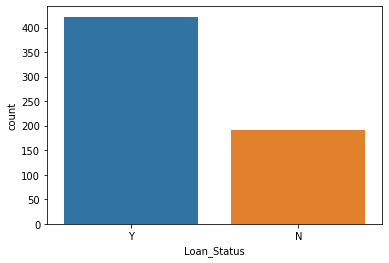

In [26]:
sns.countplot(df['Loan_Status'],label="Count")

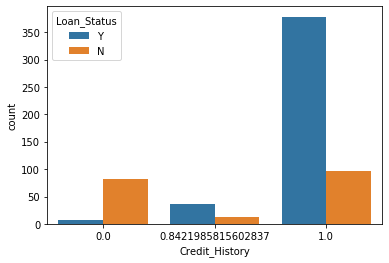

In [27]:
sns.countplot(x = 'Credit_History', hue = 'Loan_Status', data =df)

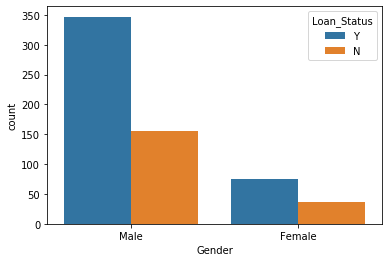

In [28]:
sns.countplot(x = 'Gender',  hue="Loan_Status", data =df)

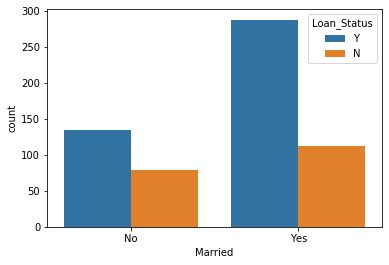

In [29]:
sns.countplot(x = 'Married',  hue="Loan_Status", data =df)

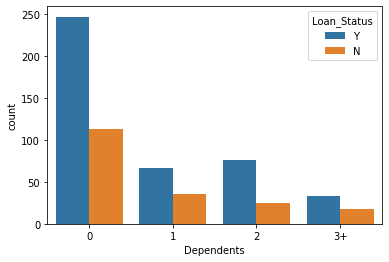

In [30]:
sns.countplot(x = 'Dependents',  hue="Loan_Status", data =df)

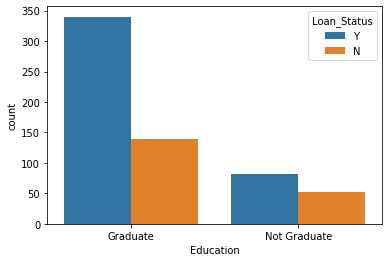

In [31]:
sns.countplot(x = 'Education',  hue="Loan_Status", data =df)

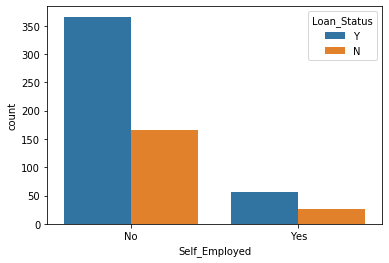

In [32]:
sns.countplot(x = 'Self_Employed',  hue="Loan_Status", data =df)

In [33]:
#lets drop useless columns
df.drop(columns=["Loan_ID"],inplace=True)

In [34]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [35]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['Gender']= label_encoder.fit_transform(df['Gender']) 
df['Married']= label_encoder.fit_transform(df['Married'])
df['Dependents']= label_encoder.fit_transform(df['Dependents'])
df['Self_Employed']= label_encoder.fit_transform(df['Self_Employed'])
df['Loan_Status']= label_encoder.fit_transform(df['Loan_Status'])
df['Education']= label_encoder.fit_transform(df['Education'])
df['Property_Area']= label_encoder.fit_transform(df['Property_Area'])


In [36]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [37]:
# in Dependents 3+ is changed to 3

In [38]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


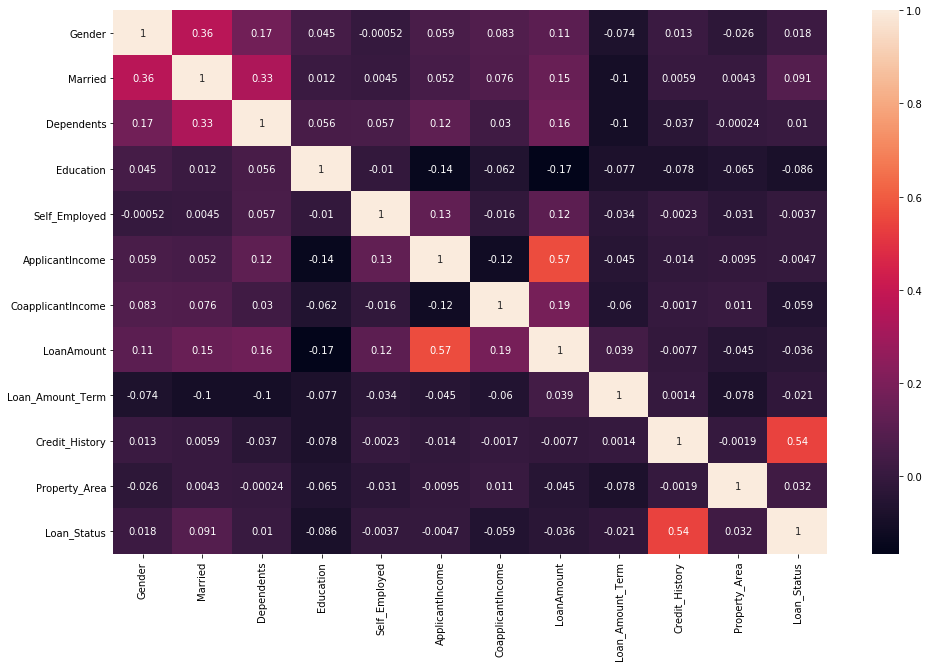

In [39]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

In [40]:
# there is confusion about Loan_Status column--> it means a person has a loan before or it is to detect fraud
#if first part is the case then whole thing is  a mistake
#if second part is the case the column name should be Loan_Fraud_Status :(
# or should we create a new column for fraud status theres no info

In [41]:
# let check correlation

In [42]:
#ignore  previously objective type data
#credit history is positively correlated with loan status
#applicant income is also positively correlated with loan amount 

In [43]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [44]:
#Lets treat the skewness
import numpy as np
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.cbrt(df[index])
    if df.skew().loc[index]<-0.5:
        df[index]=np.cbrt(df[index])

In [45]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.453698
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           0.832841
Loan_Amount_Term    -3.573315
Credit_History      -2.014285
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [46]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
dfnew=df.loc[(z_score<3).all(axis=1)]
print(dfnew.shape)

(614, 12)
(582, 12)


In [47]:
dfnew

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.000000,0.0,0.0,18.017473,0.000000,5.270588,7.113787,1.0,2,1.0
1,1.0,1.0,1.000000,0.0,0.0,16.610522,11.467457,5.039684,7.113787,1.0,0,0.0
2,1.0,1.0,0.000000,0.0,1.0,14.422496,0.000000,4.041240,7.113787,1.0,2,1.0
3,1.0,1.0,0.000000,1.0,0.0,13.720654,13.310098,4.932424,7.113787,1.0,2,1.0
4,1.0,0.0,0.000000,0.0,0.0,18.171206,0.000000,5.204828,7.113787,1.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,0.0,0.0,14.260431,0.000000,4.140818,7.113787,1.0,0,1.0
610,1.0,1.0,1.442250,0.0,0.0,16.013010,0.000000,3.419952,5.646216,1.0,0,1.0
611,1.0,1.0,1.000000,0.0,0.0,20.059821,6.214465,6.324704,7.113787,1.0,2,1.0
612,1.0,1.0,1.259921,0.0,0.0,19.646281,0.000000,5.718479,7.113787,1.0,2,1.0


# Machine learning

In [48]:
#x=dfnew.drop(columns=["Loan_Status"])

In [49]:
y=dfnew['Loan_Status']

In [50]:
df_x=dfnew.drop(columns=["Loan_Status"])

In [51]:
df_x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.0,0.0,18.017473,0.000000,5.270588,7.113787,1.0,2
1,1.0,1.0,1.000000,0.0,0.0,16.610522,11.467457,5.039684,7.113787,1.0,0
2,1.0,1.0,0.000000,0.0,1.0,14.422496,0.000000,4.041240,7.113787,1.0,2
3,1.0,1.0,0.000000,1.0,0.0,13.720654,13.310098,4.932424,7.113787,1.0,2
4,1.0,0.0,0.000000,0.0,0.0,18.171206,0.000000,5.204828,7.113787,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,0.0,0.0,14.260431,0.000000,4.140818,7.113787,1.0,0
610,1.0,1.0,1.442250,0.0,0.0,16.013010,0.000000,3.419952,5.646216,1.0,0
611,1.0,1.0,1.000000,0.0,0.0,20.059821,6.214465,6.324704,7.113787,1.0,2
612,1.0,1.0,1.259921,0.0,0.0,19.646281,0.000000,5.718479,7.113787,1.0,2


In [52]:
y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 582, dtype: float64

In [53]:
y.shape

(582,)

In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
newx=sc.transform(df_x)
newx=pd.DataFrame(newx,columns=df_x.columns)

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(newx,y,test_size=0.20,random_state=99)

In [56]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


model=[LogisticRegression(), GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.7777777777777778
[[18 25]
 [ 1 73]]
              precision    recall  f1-score   support

         0.0       0.95      0.42      0.58        43
         1.0       0.74      0.99      0.85        74

    accuracy                           0.78       117
   macro avg       0.85      0.70      0.71       117
weighted avg       0.82      0.78      0.75       117



Accuracy score of GaussianNB() is:
0.7606837606837606
[[18 25]
 [ 3 71]]
              precision    recall  f1-score   support

         0.0       0.86      0.42      0.56        43
         1.0       0.74      0.96      0.84        74

    accuracy                           0.76       117
   macro avg       0.80      0.69      0.70       117
weighted avg       0.78      0.76      0.74       117



Accuracy score of SVC() is:
0.7777777777777778
[[18 25]
 [ 1 73]]
              precision    recall  f1-score   support

         0.0       0.95      0.42      0.58        43
         1.0 

In [57]:
x_train, x_test, y_train, y_test = train_test_split(newx, y,random_state = 42,test_size=0.20,stratify=y)
lgr=LogisticRegression()
lgr.fit(x_train,y_train)
y_pred=lgr.predict(x_test)

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("Accuracy score: ",accuracy_score(y_test,y_pred))

Confusion matrix 
 [[23 13]
 [ 2 79]]
f1 score is :  0.9132947976878614
classification report 
               precision    recall  f1-score   support

         0.0       0.92      0.64      0.75        36
         1.0       0.86      0.98      0.91        81

    accuracy                           0.87       117
   macro avg       0.89      0.81      0.83       117
weighted avg       0.88      0.87      0.86       117

Accuracy score:  0.8717948717948718


In [59]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(LogisticRegression(),newx,y,cv=5,scoring="accuracy").mean())

0.8161951075744179


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfr1=RandomForestClassifier()
parameters = {"n_estimators":[10,50,100,150,200,500]}
clf = GridSearchCV(rfr1, parameters, cv=5,scoring="accuracy")
clf.fit(newx,y)#for random forest scaling is required
clf.best_params_

{'n_estimators': 150}

In [61]:
x_train, x_test, y_train, y_test = train_test_split(newx, y,random_state = 42,test_size=0.20,stratify=y)
rfr=RandomForestClassifier(n_estimators=150)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("Accuracy score: ",accuracy_score(y_test,y_pred))

Confusion matrix 
 [[23 13]
 [ 8 73]]
f1 score is :  0.874251497005988
classification report 
               precision    recall  f1-score   support

         0.0       0.74      0.64      0.69        36
         1.0       0.85      0.90      0.87        81

    accuracy                           0.82       117
   macro avg       0.80      0.77      0.78       117
weighted avg       0.82      0.82      0.82       117

Accuracy score:  0.8205128205128205


In [63]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rfr,newx,y,cv=5,scoring="accuracy").mean())

0.8007220748600059


In [64]:
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=10,scoring="accuracy")
clf.fit(df_x,y)
clf.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [65]:
x_train,x_test,y_train,y_test=train_test_split(df_x, y,random_state = 42,test_size=0.20,stratify=y)
svc=SVC(kernel="linear",C=0.1)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("Accuracy score: ",accuracy_score(y_test,y_pred))

Confusion matrix 
 [[23 13]
 [ 2 79]]
f1 score is :  0.9132947976878614
classification report 
               precision    recall  f1-score   support

         0.0       0.92      0.64      0.75        36
         1.0       0.86      0.98      0.91        81

    accuracy                           0.87       117
   macro avg       0.89      0.81      0.83       117
weighted avg       0.88      0.87      0.86       117

Accuracy score:  0.8717948717948718


In [67]:
import joblib
joblib.dump(svc,'loanpred.obj')

['loanpred.obj']